In [1]:
#Download dataset from webpage
import wget
URL = "http://ovne.org/download/housing_price.csv"
response = wget.download(URL, "housing_price.csv")

100% [..............................................................................] 73526 / 73526

In [2]:
# import all packages needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read and prepare dataset
df = pd.read_csv("housing_price.csv", header = 0, na_values ="NA",  comment ='\t', sep=',', skipinitialspace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageArea    1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  MSSubClass    1460 non-null   int64
 11  OverallCond   1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [4]:
df.head()

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond,SalePrice
0,8450,2003,856,856,854,2,3,8,548,1710,60,5,208500
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8,181500
2,11250,2001,920,920,866,2,3,6,608,1786,60,5,223500
3,9550,1915,756,961,756,1,3,7,642,1717,70,5,140000
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5,250000


LotArea: Lot size in square feet
YearBuilt: Original construction date
TotalBsmtSF: Total square feet of basement area
1stFlrSF:  First Floor square feet
2ndFlrSF: Second floor square feet
FullBath: Full bathrooms above grade
BedroomAbvGr: Number of bedrooms above basement level
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
GarageArea	: Size of garage in square feet
GrLivArea: Above grade (ground) living area square feet
MSSubClass: The building class
OverallCond: Overall condition rating

In [5]:
# Creat the feature input X and target variable Y
X = df.iloc[:,:12]
Y = df.iloc[:,12]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Create regression models
knn_model = KNeighborsRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define parameter distributions for both models
knn_param_dist = {
    'n_neighbors': np.arange(1, 21),  # Randomly select values from 1 to 20
    'weights': ['uniform', 'distance']
}

decision_tree_param_dist = {
    'max_depth': [None] + list(np.arange(1, 41)),  # Randomly select values from 1 to 30 or None
    'min_samples_split': np.arange(2, 11)  # Randomly select values from 2 to 10
}

# Create RandomizedSearchCV objects for both models
knn_random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_dist, n_iter=20, scoring='neg_mean_absolute_error', cv=5)
decision_tree_random_search = RandomizedSearchCV(estimator=decision_tree_model, param_distributions=decision_tree_param_dist, n_iter=20, scoring='neg_mean_absolute_error', cv=5)

# Fit the randomized searches to the training data
knn_random_search.fit(X_train, y_train)
decision_tree_random_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding mean squared error scores for both models
print("Best hyperparameters for KNN:", knn_random_search.best_params_)
print("Best negative mean absolute error for KNN:", knn_random_search.best_score_)

print("Best hyperparameters for Decision Tree:", decision_tree_random_search.best_params_)
print("Best negative mean absolute error for Decision Tree:", decision_tree_random_search.best_score_)

# Evaluate the best models on the test data
knn_best_model = knn_random_search.best_estimator_
decision_tree_best_model = decision_tree_random_search.best_estimator_

knn_test_mae = knn_best_model.score(X_test, y_test)
decision_tree_test_mae = decision_tree_best_model.score(X_test, y_test)

print("Test score for best KNN model:", knn_test_mae)
print("Test score for best Decision Tree model:", decision_tree_test_mae)



Best hyperparameters for KNN: {'weights': 'distance', 'n_neighbors': 15}
Best negative mean absolute error for KNN: -29183.611425268107
Best hyperparameters for Decision Tree: {'min_samples_split': 7, 'max_depth': 33}
Best negative mean absolute error for Decision Tree: -27256.041586393258
Test score for best KNN model: 0.6488488113866961
Test score for best Decision Tree model: 0.8143137718078369


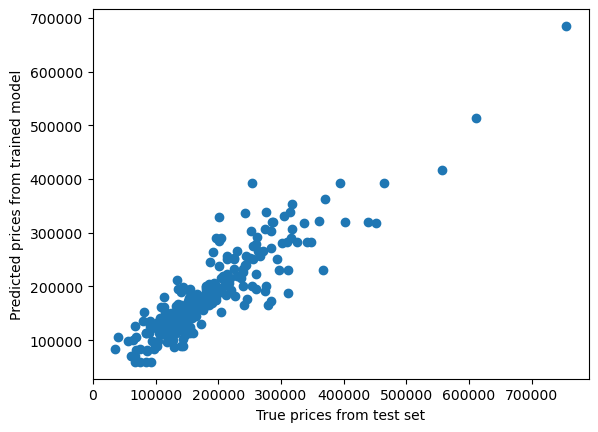

In [8]:
# scatter plot for original data
y_pred_dt = decision_tree_best_model.predict(X_test)
plt.scatter(y_test, y_pred_dt)
plt.xlabel("True prices from test set")
plt.ylabel("Predicted prices from trained model")
plt.show()

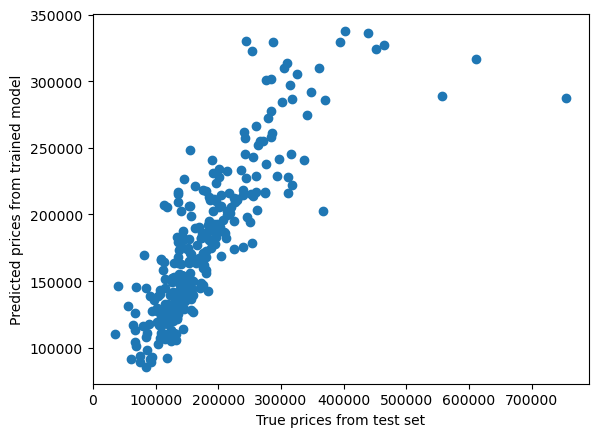

In [9]:
# scatter plot for original data
y_pred_knn = knn_best_model.predict(X_test)
plt.scatter(y_test, y_pred_knn)
plt.xlabel("True prices from test set")
plt.ylabel("Predicted prices from trained model")
plt.show()